### Importing the necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
pwd

'C:\\Users\\Sowmya Ganesh\\Documents'

In [3]:
os.chdir('C:/Users/Sowmya Ganesh/Documents')

### Extracting the Data

In [4]:
#Importing the data
data = pd.read_csv("C:/Users/Sowmya Ganesh/Documents/iphone_purchase_records.csv")
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [5]:
#creating a copy of data
data1 = data.copy()

### Basic Informartion Check

In [6]:
data1.shape

(400, 4)

In [7]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
Salary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchase Iphone,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
data1.dtypes

Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
#Since Gender column is object,we should convert into int
dumm = pd.get_dummies(data1['Gender']).astype('int')
dumm

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [11]:
data_ip = pd.concat([data1, dumm], axis=1)
data_ip

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


In [12]:
#No null values found
#There are 400 sets of data with 4 columns

### Exploratory Data Analysis(EDA)

In [13]:
data_ip.head(3)

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0


In [14]:
#To check number of males and females
data_ip.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [15]:
salary_data=np.array(data1["Salary"])
print(min(salary_data))
print(max(salary_data))

15000
150000


In [16]:
#Since gender is an object, we have to convert this textual column to numerical column using Label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_ip['Gender'] = label.fit_transform(data_ip['Gender'])
data_ip.head(2)

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,1,19,19000,0,0,1
1,1,35,20000,0,0,1


In [17]:
#To find correlation between the columns
data_ip[["Age","Salary","Purchase Iphone","Gender"]].corr()

,Age,Salary,Purchase Iphone,Gender
Age,1.000000,0.155238,0.622454,-0.073741
Salary,0.155238,1.000000,0.362083,-0.060435
Purchase Iphone,0.622454,0.362083,1.000000,-0.042469
Gender,-0.073741,-0.060435,-0.042469,1.000000


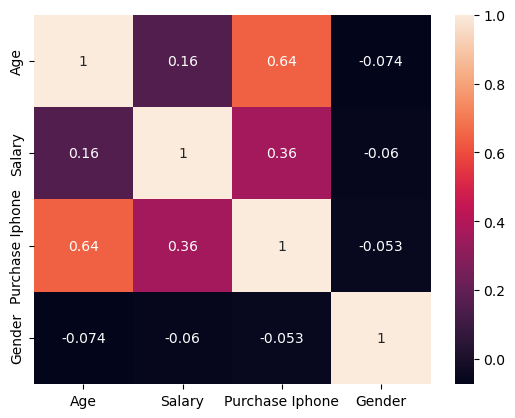

In [44]:
sns.heatmap(data_ip[["Age","Salary","Purchase Iphone","Gender"]].corr(),annot=True)
plt.savefig("Heatmap_iphone.png")

In [19]:
#The heatmap show that Purchase of iphome is more correlated with Age

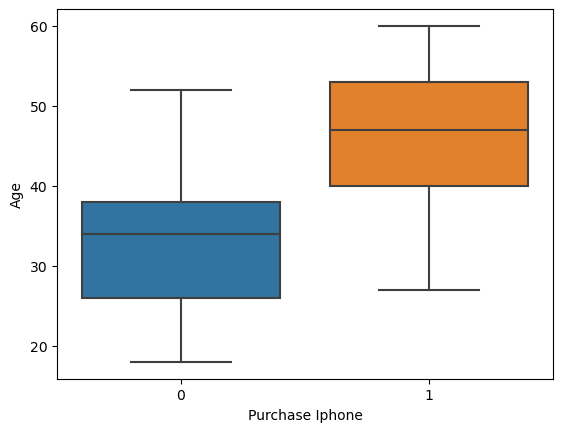

In [45]:
sns.boxplot(x = 'Purchase Iphone', y = 'Age', data = data_ip)
plt.savefig("Boxplot_iphone.png")

In [21]:
Q1 = data_ip[(data_ip['Purchase Iphone'] == 0)]['Age'].quantile(0.25)
print(f'The Q1 value is {Q1}')
Q3 = data_ip[(data_ip['Purchase Iphone'] == 0)]['Age'].quantile(0.75)
print(f'The Q3 value is {Q3}')
IQR = Q3 - Q1
print(f'The IQR value is {IQR}')
upper = Q3 + 1.5 * IQR
print(f'The Upper threshold value is {upper}')
lower = Q1 - 1.5 * IQR
print(f'The Lower threshold value is {lower}')

outliers = data_ip[(data_ip['Purchase Iphone']==0)& (data_ip['Age']> upper)]
print(outliers)
data_ip.loc[outliers.index, 'Purchase Iphone'] = 1

The Q1 value is 26.0
The Q3 value is 38.0
The IQR value is 12.0
The Upper threshold value is 56.0
The Lower threshold value is 8.0
     Gender  Age  Salary  Purchase Iphone  Female  Male
64        0   59   83000                0       1     0
212       0   59   42000                0       1     0


### Model Planning for Decision Tree

### Train_Test_Split

In [22]:
y = data_ip['Purchase Iphone']
X = data[['Salary','Age']]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

In [24]:
X_train.shape,y_train.shape

((280, 2), (280,))

In [25]:
X_test.shape,y_test.shape

((120, 2), (120,))

In [26]:
model = DecisionTreeClassifier(criterion='entropy')
train_model=model.fit(X_train,y_train)
pred = train_model.predict(X_test)
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [27]:
y_test

139    0
65     0
221    1
277    1
110    0
      ..
343    1
130    0
323    1
82     0
381    1
Name: Purchase Iphone, Length: 120, dtype: int64

In [28]:
acc = accuracy_score(y_test, pred)
print('The accuracy of the model is',round(acc*100,2),'%')

The accuracy of the model is 89.17 %


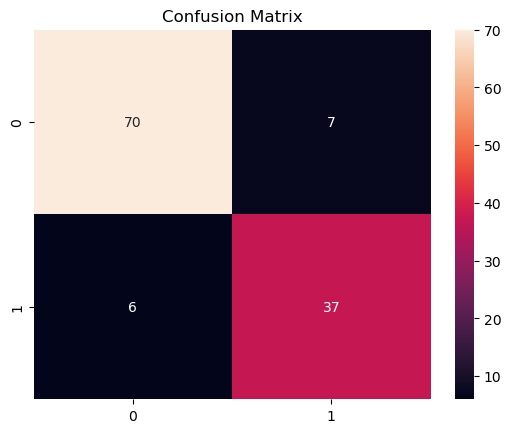

<Figure size 640x480 with 0 Axes>

In [49]:
sns.heatmap(confusion_matrix(pred,y_test), annot=True)
plt.title('Confusion Matrix')
plt.show()
plt.savefig("confusion_iphone.png")

In [36]:
#The actual values and the predicted values
result_df = pd.DataFrame({'Actual_Values':y_test,'DecisionTree_Values':pred})  
result_df                        

,Actual_Values,DecisionTree_Values
139,0,0
65,0,0
221,1,1
277,1,1
110,0,0
...,...,...
343,1,1
130,0,0
323,1,1
82,0,0


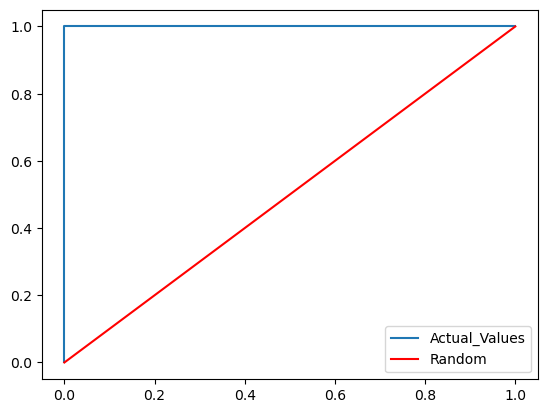

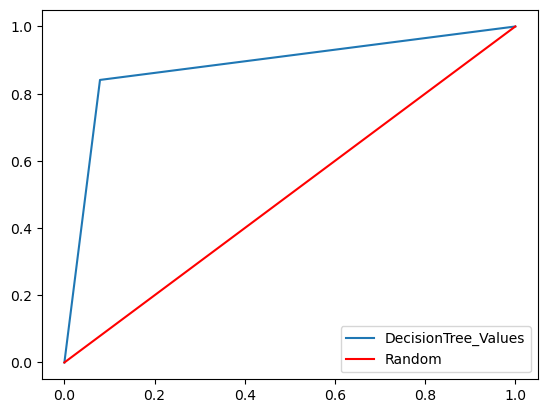

<Figure size 640x480 with 0 Axes>

In [46]:
for model in result_df:
    fpr,tpr,thresh = roc_curve(result_df['Actual_Values'],result_df[model])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=model)
    plt.plot([0,1],[0,1],'r-',label = 'Random')
    plt.legend()
    plt.show()
    plt.savefig("fpr_tpr_iphone.png")


### Saving the Model

In [33]:
import joblib
joblib.dump(model,'DecisionTreeClassifier.sav')

['DecisionTreeClassifier.sav']